# Notes

- Encoded subscription_status 
    - Active = 0, Cancelled = 1
- Created a tenure days column from 1 month to 5 years (random values)
- Encoded 'discount_used_last_renewal','auto_renew','previous_renewal_status','downgrade_history'
    - Yes = 1 , No = 0
    - Auto = 1 , Manual = 0 

- Dropped --> subscription_status, subscription_start_date,subscription_end_date,'discount_used_last_renewal','auto_renew','previous_renewal_status','downgrade_history'

# Imports And Reading CSV

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Economist_Churn_Dataset.csv')

In [3]:
df

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,sentiment_score,subscription_start_date,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,0.29,2023-11-12 05:54:16.425367,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,-0.02,2023-07-27 05:54:16.425389,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,-0.18,2023-11-27 05:54:16.425394,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,0.36,2023-03-07 05:54:16.425399,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,0.46,2024-01-13 05:54:16.425403,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,0.22,2022-10-09 05:54:16.429168,2023-10-09 05:54:16.429168,2,24,Female,Referral,PayPal,No,Active
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,-0.21,2023-06-13 05:54:16.429169,2024-06-12 05:54:16.429169,4,24,Male,Mobile App,Credit Card,No,Active
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,0.66,2023-06-18 05:54:16.429172,2024-06-17 05:54:16.429172,2,66,Female,Web,PayPal,Yes,Active
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,0.38,2022-11-10 05:54:16.429174,2023-11-10 05:54:16.429174,5,60,Male,Mobile App,Credit Card,No,Cancelled


# Info of DF

In [4]:
df.head()

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,sentiment_score,subscription_start_date,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,0.29,2023-11-12 05:54:16.425367,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,-0.02,2023-07-27 05:54:16.425389,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,-0.18,2023-11-27 05:54:16.425394,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,0.36,2023-03-07 05:54:16.425399,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,0.46,2024-01-13 05:54:16.425403,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active


In [5]:
df.describe()


,customer_id,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,email_open_rate,time_spent_per_session_mins,completion_rate,article_skips_per_week,campaign_ctr,nps_score,sentiment_score,csat_score,customer_age
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.014620,15.04000,0.985000,0.479510,10.022040,0.644560,0.996000,0.287210,-2.82100,0.037790,3.016000,43.838000
std,288.819436,1.480891,8.57636,0.945341,0.284461,4.182202,0.202782,0.998489,0.156708,56.27429,0.502976,1.419775,14.891122
min,1.000000,0.000000,0.00000,0.000000,0.000000,-4.750000,0.300000,0.000000,0.000000,-100.00000,-1.490000,1.000000,18.000000
25%,250.750000,1.930000,8.00000,0.000000,0.230000,7.137500,0.460000,0.000000,0.170000,-51.00000,-0.330000,2.000000,31.000000
50%,500.500000,3.010000,15.00000,1.000000,0.460000,9.955000,0.640000,1.000000,0.270000,-2.00000,0.050000,3.000000,44.000000
75%,750.250000,4.030000,22.00000,2.000000,0.712500,12.885000,0.810000,2.000000,0.390000,45.25000,0.402500,4.000000,57.000000
max,1000.000000,8.890000,29.00000,5.000000,1.000000,22.470000,1.000000,6.000000,0.790000,99.00000,1.430000,5.000000,69.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  1000 non-null   int64  
 1   subscription_type            1000 non-null   object 
 2   plan_type                    1000 non-null   object 
 3   auto_renew                   1000 non-null   object 
 4   avg_articles_per_week        1000 non-null   float64
 5   days_since_last_login        1000 non-null   int64  
 6   support_tickets_last_90d     1000 non-null   int64  
 7   discount_used_last_renewal   1000 non-null   object 
 8   email_open_rate              1000 non-null   float64
 9   time_spent_per_session_mins  1000 non-null   float64
 10  region                       1000 non-null   object 
 11  most_read_category           1000 non-null   object 
 12  completion_rate              1000 non-null   float64
 13  article_skips_per_w

In [8]:
df.isnull().sum()


customer_id                      0
subscription_type                0
plan_type                        0
auto_renew                       0
avg_articles_per_week            0
days_since_last_login            0
support_tickets_last_90d         0
discount_used_last_renewal       0
email_open_rate                  0
time_spent_per_session_mins      0
region                           0
most_read_category               0
completion_rate                  0
article_skips_per_week           0
primary_device                   0
previous_renewal_status          0
last_campaign_engaged          455
campaign_ctr                     0
nps_score                        0
sentiment_score                  0
subscription_start_date          0
subscription_end_date            0
csat_score                       0
customer_age                     0
gender                           0
signup_source                    0
payment_method                   0
downgrade_history                0
subscription_status 

In [12]:
df['last_campaign_engaged'].unique()


array(['Retention Offer', 'Newsletter Promo', nan, 'Survey'], dtype=object)

# Exploratory Data Analysis

# Correlation analysis

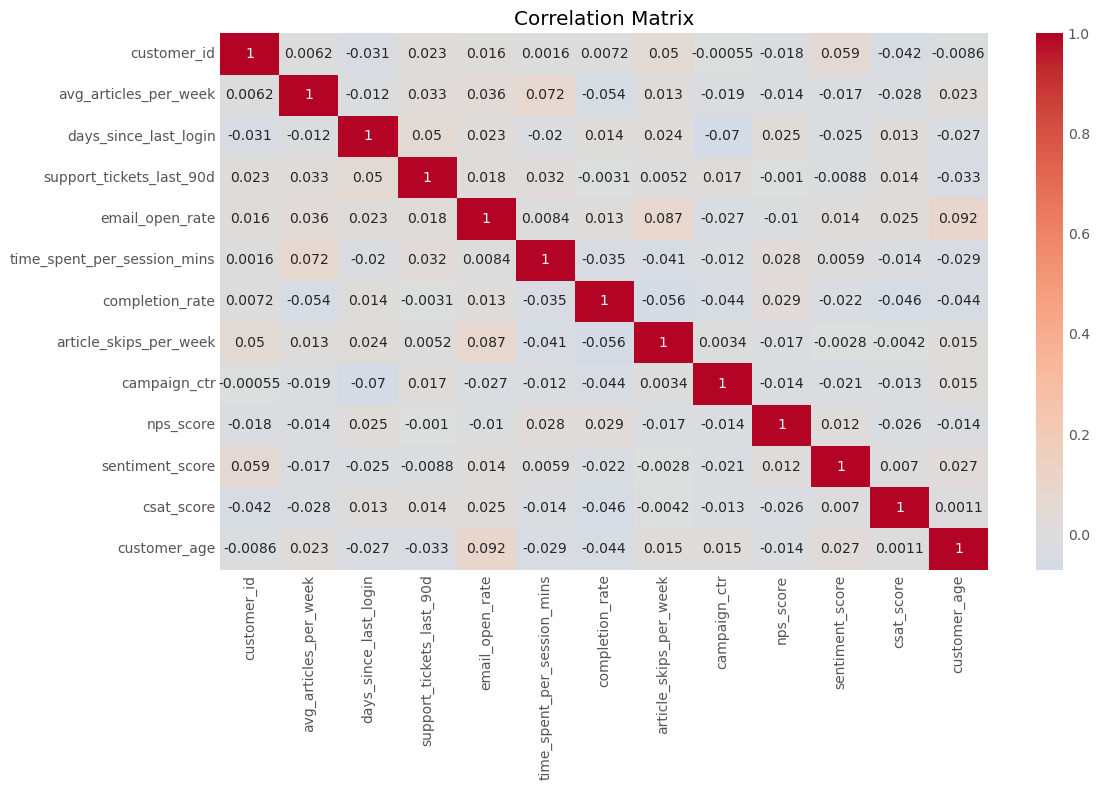

In [57]:
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-v0_8-pastel')
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of numerical variables

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
numerical_cols 

Index(['customer_id', 'avg_articles_per_week', 'days_since_last_login',
       'support_tickets_last_90d', 'email_open_rate',
       'time_spent_per_session_mins', 'completion_rate',
       'article_skips_per_week', 'campaign_ctr', 'nps_score',
       'sentiment_score', 'csat_score', 'customer_age'],
      dtype='object')

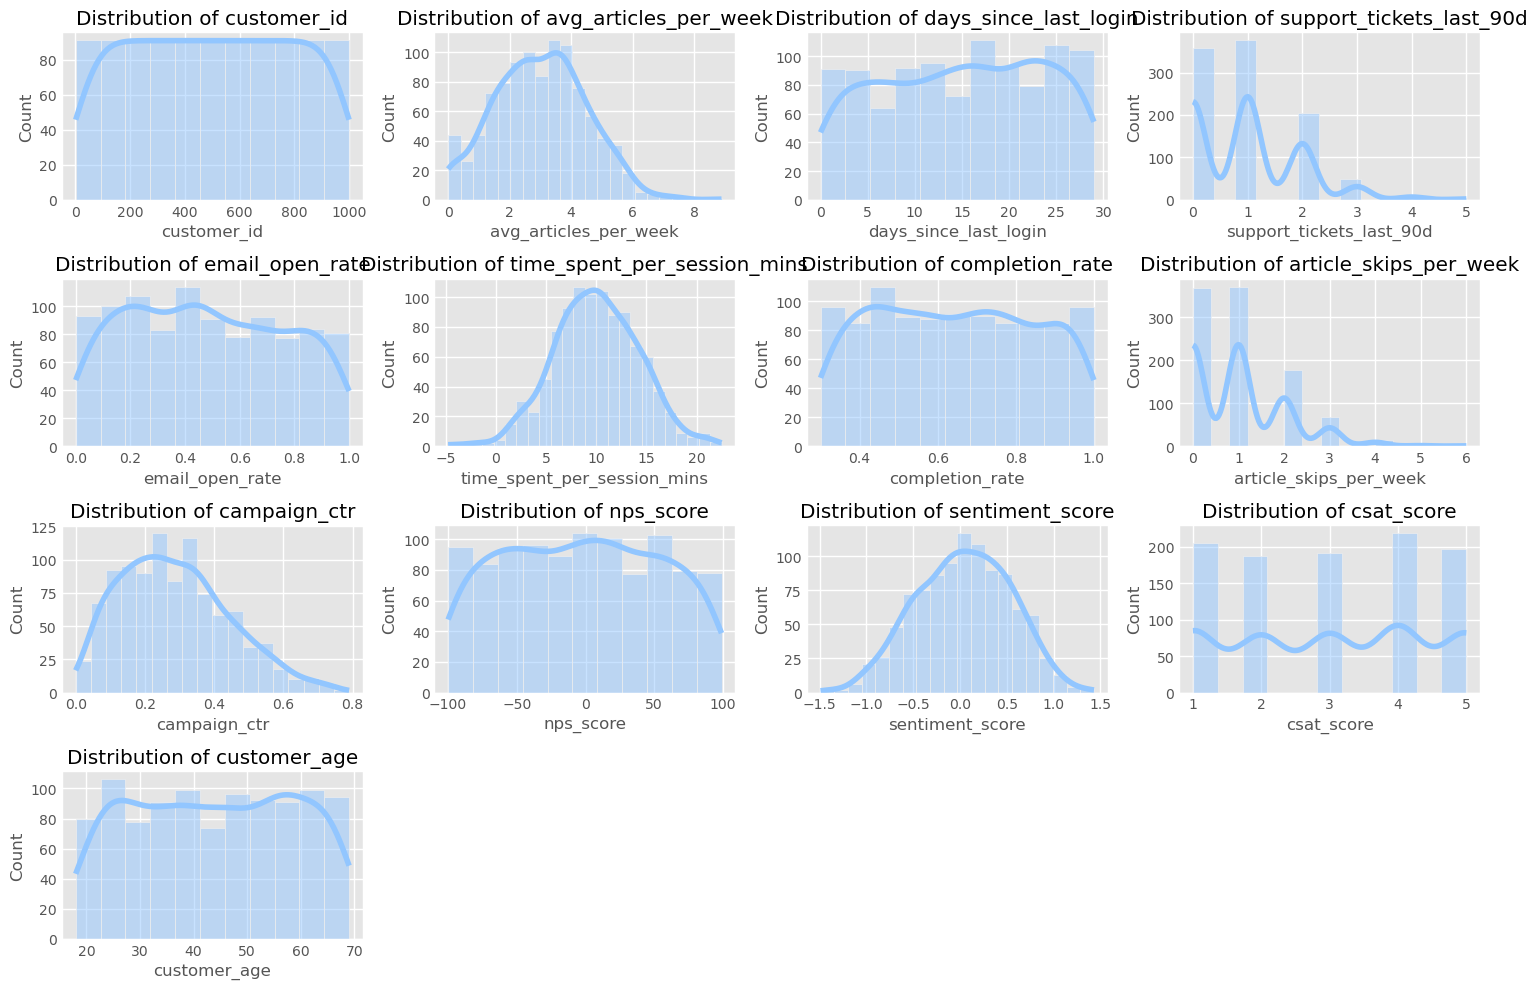

In [55]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-pastel')
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Categorical variables analysis

In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['subscription_type', 'plan_type', 'auto_renew',
       'discount_used_last_renewal', 'region', 'most_read_category',
       'primary_device', 'previous_renewal_status', 'last_campaign_engaged',
       'subscription_start_date', 'subscription_end_date', 'gender',
       'signup_source', 'payment_method', 'downgrade_history',
       'subscription_status'],
      dtype='object')

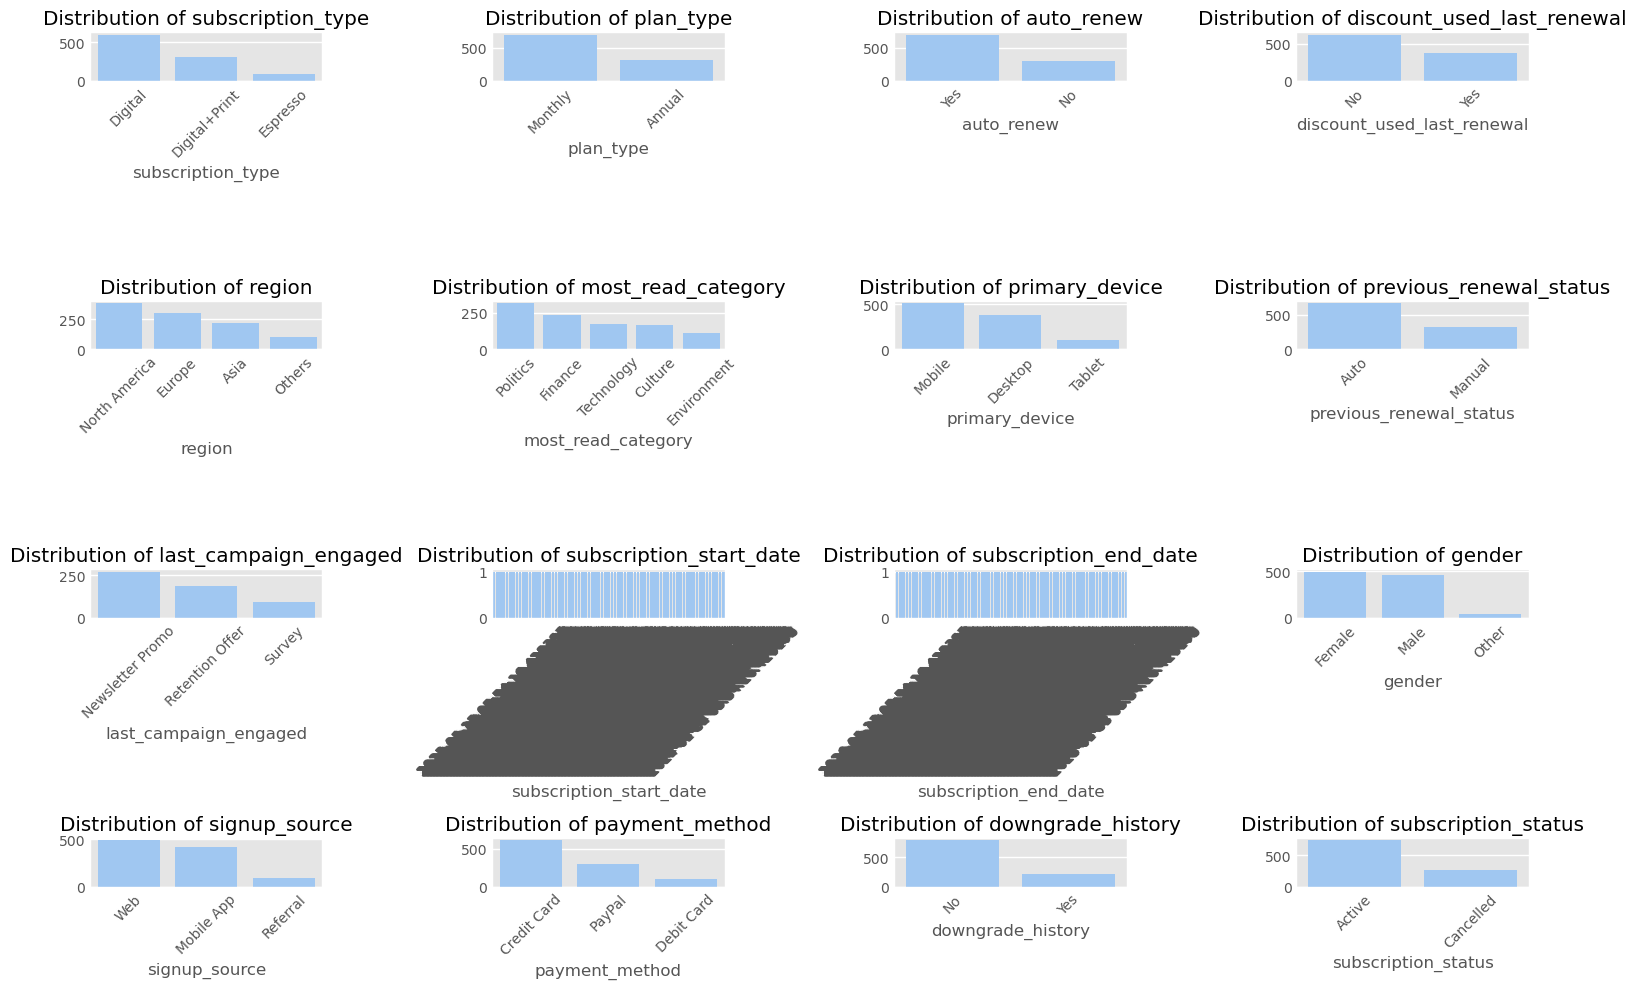

In [58]:
plt.figure(figsize=(15, 10))
plt.style.use('seaborn-v0_8-pastel')
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [ ]:
# Box plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show() 

In [49]:
numerical_cols

Index(['customer_id', 'avg_articles_per_week', 'days_since_last_login',
       'support_tickets_last_90d', 'email_open_rate',
       'time_spent_per_session_mins', 'completion_rate',
       'article_skips_per_week', 'campaign_ctr', 'nps_score',
       'sentiment_score', 'csat_score', 'customer_age'],
      dtype='object')

In [48]:
categorical_cols

Index(['subscription_type', 'plan_type', 'auto_renew',
       'discount_used_last_renewal', 'region', 'most_read_category',
       'primary_device', 'previous_renewal_status', 'last_campaign_engaged',
       'subscription_start_date', 'subscription_end_date', 'gender',
       'signup_source', 'payment_method', 'downgrade_history',
       'subscription_status'],
      dtype='object')

In [50]:
df

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,sentiment_score,subscription_start_date,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,0.29,2023-11-12 05:54:16.425367,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,-0.02,2023-07-27 05:54:16.425389,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,-0.18,2023-11-27 05:54:16.425394,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,0.36,2023-03-07 05:54:16.425399,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,0.46,2024-01-13 05:54:16.425403,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,0.22,2022-10-09 05:54:16.429168,2023-10-09 05:54:16.429168,2,24,Female,Referral,PayPal,No,Active
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,-0.21,2023-06-13 05:54:16.429169,2024-06-12 05:54:16.429169,4,24,Male,Mobile App,Credit Card,No,Active
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,0.66,2023-06-18 05:54:16.429172,2024-06-17 05:54:16.429172,2,66,Female,Web,PayPal,Yes,Active
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,0.38,2022-11-10 05:54:16.429174,2023-11-10 05:54:16.429174,5,60,Male,Mobile App,Credit Card,No,Cancelled


In [16]:
df['churn'] = df['subscription_status'].apply(lambda x: 1 if x.lower() == 'cancelled' else 0)

In [62]:
churn_counts = df['churn'].value_counts()
churn_percent = df['churn'].value_counts(normalize=True) * 100

In [63]:
churn_counts

churn
0    736
1    264
Name: count, dtype: int64

In [64]:
churn_percent

churn
0    73.6
1    26.4
Name: proportion, dtype: float64

In [71]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_distribution = {
    col: df[col].value_counts().head(5)
    for col in categorical_cols if df[col].nunique() <= 10
}
print(categorical_distribution)

{'subscription_type': subscription_type
Digital          602
Digital+Print    311
Espresso          87
Name: count, dtype: int64, 'plan_type': plan_type
Monthly    693
Annual     307
Name: count, dtype: int64, 'auto_renew': auto_renew
Yes    702
No     298
Name: count, dtype: int64, 'discount_used_last_renewal': discount_used_last_renewal
No     621
Yes    379
Name: count, dtype: int64, 'region': region
North America    381
Europe           302
Asia             215
Others           102
Name: count, dtype: int64, 'most_read_category': most_read_category
Politics       315
Finance        234
Technology     173
Culture        164
Environment    114
Name: count, dtype: int64, 'primary_device': primary_device
Mobile     512
Desktop    386
Tablet     102
Name: count, dtype: int64, 'previous_renewal_status': previous_renewal_status
Auto      670
Manual    330
Name: count, dtype: int64, 'last_campaign_engaged': last_campaign_engaged
Newsletter Promo    269
Retention Offer     184
Survey       

C:\Users\adity\AppData\Local\Temp\ipykernel_3196\870767234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='churn', palette='Set2')


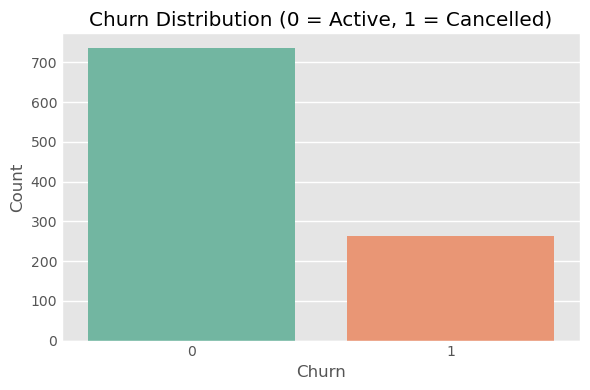

In [68]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette='Set2')
plt.title('Churn Distribution (0 = Active, 1 = Cancelled)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [17]:
df

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,subscription_start_date,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status,churn
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,2023-11-12 05:54:16.425367,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled,1
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,2023-07-27 05:54:16.425389,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active,0
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,2023-11-27 05:54:16.425394,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active,0
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,2023-03-07 05:54:16.425399,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled,1
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,2024-01-13 05:54:16.425403,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,2022-10-09 05:54:16.429168,2023-10-09 05:54:16.429168,2,24,Female,Referral,PayPal,No,Active,0
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,2023-06-13 05:54:16.429169,2024-06-12 05:54:16.429169,4,24,Male,Mobile App,Credit Card,No,Active,0
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,2023-06-18 05:54:16.429172,2024-06-17 05:54:16.429172,2,66,Female,Web,PayPal,Yes,Active,0
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,2022-11-10 05:54:16.429174,2023-11-10 05:54:16.429174,5,60,Male,Mobile App,Credit Card,No,Cancelled,1


In [13]:
df.groupby(['subscription_type', 'subscription_status']).size()

subscription_type  subscription_status
Digital            Active                 454
                   Cancelled              148
Digital+Print      Active                 224
                   Cancelled               87
Espresso           Active                  58
                   Cancelled               29
dtype: int64

In [22]:
df['time_spent_per_session_mins'] = df['time_spent_per_session_mins'].clip(lower=0)

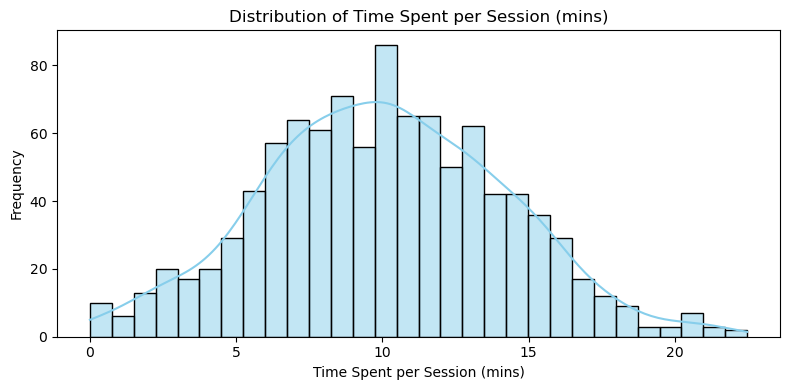

In [23]:
plt.figure(figsize=(8, 4))
sns.histplot(df['time_spent_per_session_mins'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Time Spent per Session (mins)')
plt.xlabel('Time Spent per Session (mins)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [18]:
correlation = df['time_spent_per_session_mins'].corr(df['churn'])

C:\Users\adity\AppData\Local\Temp\ipykernel_21284\1750367767.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='time_spent_per_session_mins', data=df, palette='Set2')


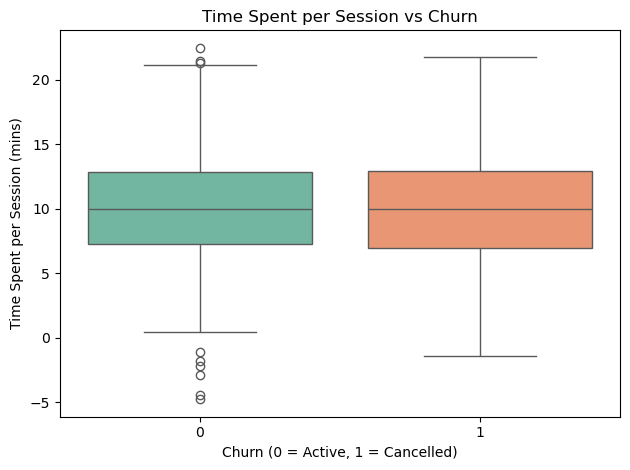

In [20]:
sns.boxplot(x='churn', y='time_spent_per_session_mins', data=df, palette='Set2')
plt.title('Time Spent per Session vs Churn')
plt.xlabel('Churn (0 = Active, 1 = Cancelled)')
plt.ylabel('Time Spent per Session (mins)')
plt.tight_layout()
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_21284\3319952310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='churn', y='time_spent_per_session_mins', data=df, palette='Pastel1')


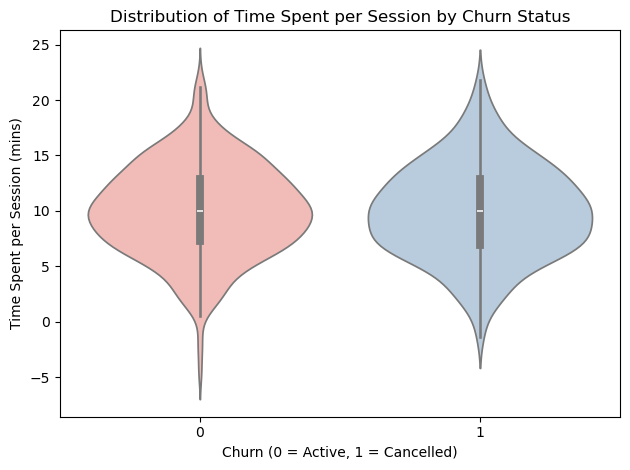

In [21]:
sns.violinplot(x='churn', y='time_spent_per_session_mins', data=df, palette='Pastel1')
plt.title('Distribution of Time Spent per Session by Churn Status')
plt.xlabel('Churn (0 = Active, 1 = Cancelled)')
plt.ylabel('Time Spent per Session (mins)')
plt.tight_layout()
plt.show()


In [24]:
df['subscription_start_date'] = pd.to_datetime(df['subscription_start_date'])
df['subscription_end_date'] = pd.to_datetime(df['subscription_end_date'])

# Create tenure column
df['tenure_days'] = (df['subscription_end_date'] - df['subscription_start_date']).dt.days

In [25]:
df

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status,churn,tenure_days
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled,1,365
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active,0,365
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active,0,365
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled,1,365
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active,0,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,2023-10-09 05:54:16.429168,2,24,Female,Referral,PayPal,No,Active,0,365
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,2024-06-12 05:54:16.429169,4,24,Male,Mobile App,Credit Card,No,Active,0,365
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,2024-06-17 05:54:16.429172,2,66,Female,Web,PayPal,Yes,Active,0,365
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,2023-11-10 05:54:16.429174,5,60,Male,Mobile App,Credit Card,No,Cancelled,1,365


In [31]:
df['tenure_days'].sum()

365000

In [32]:
df['tenure_days'] = np.random.randint(30, 1826, size=len(df))

In [33]:
df

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,subscription_end_date,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,subscription_status,churn,tenure_days
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,2024-11-11 05:54:16.425367,5,58,Female,Mobile App,Credit Card,No,Cancelled,1,905
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,2024-07-26 05:54:16.425389,5,59,Male,Mobile App,PayPal,No,Active,0,1426
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,2024-11-26 05:54:16.425394,3,47,Female,Mobile App,PayPal,Yes,Active,0,1167
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,2024-03-06 05:54:16.425399,2,22,Other,Mobile App,PayPal,No,Cancelled,1,1404
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,2025-01-12 05:54:16.425403,2,27,Female,Mobile App,PayPal,No,Active,0,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,2023-10-09 05:54:16.429168,2,24,Female,Referral,PayPal,No,Active,0,149
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,2024-06-12 05:54:16.429169,4,24,Male,Mobile App,Credit Card,No,Active,0,1767
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,2024-06-17 05:54:16.429172,2,66,Female,Web,PayPal,Yes,Active,0,1754
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,2023-11-10 05:54:16.429174,5,60,Male,Mobile App,Credit Card,No,Cancelled,1,896


In [34]:
df_v1 = df.drop(columns=['subscription_end_date', 'subscription_start_date', 'subscription_status'])

In [35]:
df_v1

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,nps_score,sentiment_score,csat_score,customer_age,gender,signup_source,payment_method,downgrade_history,churn,tenure_days
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,-19,0.29,5,58,Female,Mobile App,Credit Card,No,1,905
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,-94,-0.02,5,59,Male,Mobile App,PayPal,No,0,1426
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,-24,-0.18,3,47,Female,Mobile App,PayPal,Yes,0,1167
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,21,0.36,2,22,Other,Mobile App,PayPal,No,1,1404
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,-32,0.46,2,27,Female,Mobile App,PayPal,No,0,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,-63,0.22,2,24,Female,Referral,PayPal,No,0,149
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,-87,-0.21,4,24,Male,Mobile App,Credit Card,No,0,1767
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,10,0.66,2,66,Female,Web,PayPal,Yes,0,1754
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,21,0.38,5,60,Male,Mobile App,Credit Card,No,1,896


In [36]:
df_v1.to_csv('Economist_Churn_Dataset_v1.csv', index=False)

In [38]:
df_v1[['discount_used_last_renewal','auto_renew','previous_renewal_status','downgrade_history']]

,discount_used_last_renewal,auto_renew,previous_renewal_status,downgrade_history
0,Yes,No,Auto,No
1,No,No,Auto,No
2,No,Yes,Auto,Yes
3,No,No,Auto,No
4,No,No,Auto,No
...,...,...,...,...
995,No,Yes,Manual,No
996,No,No,Auto,No
997,Yes,Yes,Auto,Yes
998,No,No,Auto,No


In [49]:
print(df_v1['discount_used_last_renewal'].value_counts())
print(df_v1['auto_renew'].value_counts())
print(df_v1['previous_renewal_status'].value_counts())
print(df_v1['downgrade_history'].value_counts())

discount_used_last_renewal
No     621
Yes    379
Name: count, dtype: int64
auto_renew
Yes    702
No     298
Name: count, dtype: int64
previous_renewal_status
Auto      670
Manual    330
Name: count, dtype: int64
downgrade_history
No     792
Yes    208
Name: count, dtype: int64


In [50]:
df_v1['discount_used_last_renewal_encoded'] = df_v1['discount_used_last_renewal'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
df_v1['auto_renew_encoded'] = df_v1['auto_renew'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
df_v1['previous_renewal_status_encoded'] = df_v1['previous_renewal_status'].apply(lambda x: 1 if x.lower() == 'auto' else 0)
df_v1['downgrade_history_encoded'] = df_v1['downgrade_history'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [51]:
df_v1

,customer_id,subscription_type,plan_type,auto_renew,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,discount_used_last_renewal,email_open_rate,time_spent_per_session_mins,...,gender,signup_source,payment_method,downgrade_history,churn,tenure_days,discount_used_last_renewal_encoded,auto_renew_encoded,previous_renewal_status_encoded,downgrade_history_encoded
0,1,Digital,Monthly,No,4.59,22,1,Yes,0.89,9.83,...,Female,Mobile App,Credit Card,No,1,905,1,0,1,0
1,2,Digital+Print,Monthly,No,3.93,12,1,No,0.20,4.10,...,Male,Mobile App,PayPal,No,0,1426,0,0,1,0
2,3,Digital,Annual,Yes,4.03,22,0,No,0.61,13.79,...,Female,Mobile App,PayPal,Yes,0,1167,0,1,1,1
3,4,Digital,Annual,No,0.95,17,0,No,0.09,10.22,...,Other,Mobile App,PayPal,No,1,1404,0,0,1,0
4,5,Digital,Annual,No,4.82,27,0,No,0.39,11.69,...,Female,Mobile App,PayPal,No,0,571,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,Yes,5.44,14,2,No,0.17,5.95,...,Female,Referral,PayPal,No,0,149,0,1,0,0
996,997,Digital+Print,Annual,No,2.57,11,1,No,0.96,2.26,...,Male,Mobile App,Credit Card,No,0,1767,0,0,1,0
997,998,Espresso,Monthly,Yes,5.39,9,0,Yes,0.85,7.80,...,Female,Web,PayPal,Yes,0,1754,1,1,1,1
998,999,Digital,Monthly,No,4.02,18,0,No,0.23,15.32,...,Male,Mobile App,Credit Card,No,1,896,0,0,1,0


In [52]:
df_v1.drop(columns=['discount_used_last_renewal','auto_renew','previous_renewal_status','downgrade_history'], inplace=True)


In [53]:
df_v1.to_csv('Economist_Churn_Dataset_v2.csv', index=False)


In [54]:
df_v1

,customer_id,subscription_type,plan_type,avg_articles_per_week,days_since_last_login,support_tickets_last_90d,email_open_rate,time_spent_per_session_mins,region,most_read_category,...,customer_age,gender,signup_source,payment_method,churn,tenure_days,discount_used_last_renewal_encoded,auto_renew_encoded,previous_renewal_status_encoded,downgrade_history_encoded
0,1,Digital,Monthly,4.59,22,1,0.89,9.83,Europe,Politics,...,58,Female,Mobile App,Credit Card,1,905,1,0,1,0
1,2,Digital+Print,Monthly,3.93,12,1,0.20,4.10,Asia,Politics,...,59,Male,Mobile App,PayPal,0,1426,0,0,1,0
2,3,Digital,Annual,4.03,22,0,0.61,13.79,Europe,Politics,...,47,Female,Mobile App,PayPal,0,1167,0,1,1,1
3,4,Digital,Annual,0.95,17,0,0.09,10.22,Europe,Technology,...,22,Other,Mobile App,PayPal,1,1404,0,0,1,0
4,5,Digital,Annual,4.82,27,0,0.39,11.69,Asia,Culture,...,27,Female,Mobile App,PayPal,0,571,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Digital,Monthly,5.44,14,2,0.17,5.95,North America,Finance,...,24,Female,Referral,PayPal,0,149,0,1,0,0
996,997,Digital+Print,Annual,2.57,11,1,0.96,2.26,North America,Environment,...,24,Male,Mobile App,Credit Card,0,1767,0,0,1,0
997,998,Espresso,Monthly,5.39,9,0,0.85,7.80,Asia,Finance,...,66,Female,Web,PayPal,0,1754,1,1,1,1
998,999,Digital,Monthly,4.02,18,0,0.23,15.32,Asia,Technology,...,60,Male,Mobile App,Credit Card,1,896,0,0,1,0


In [55]:
df_v1.columns

Index(['customer_id', 'subscription_type', 'plan_type',
       'avg_articles_per_week', 'days_since_last_login',
       'support_tickets_last_90d', 'email_open_rate',
       'time_spent_per_session_mins', 'region', 'most_read_category',
       'completion_rate', 'article_skips_per_week', 'primary_device',
       'last_campaign_engaged', 'campaign_ctr', 'nps_score', 'sentiment_score',
       'csat_score', 'customer_age', 'gender', 'signup_source',
       'payment_method', 'churn', 'tenure_days',
       'discount_used_last_renewal_encoded', 'auto_renew_encoded',
       'previous_renewal_status_encoded', 'downgrade_history_encoded'],
      dtype='object')

In [ ]:
'subscription_type', 'plan_type',
       'avg_articles_per_week', 'days_since_last_login',
       'support_tickets_last_90d', 'email_open_rate',
       'time_spent_per_session_mins', 'region', 'most_read_category',
       'completion_rate', 'article_skips_per_week', 'primary_device',
       'last_campaign_engaged', 'campaign_ctr', 'nps_score', 'sentiment_score',
       'csat_score', 'customer_age', 'gender', 'signup_source',
       'payment_method', 


['customer_id', 'churn', 'tenure_days',
       'discount_used_last_renewal_encoded', 'auto_renew_encoded',
       'previous_renewal_status_encoded', 'downgrade_history_encoded'],

In [64]:
df_v1.groupby(['subscription_type', 'churn']).size()


subscription_type  churn
Digital            0        454
                   1        148
Digital+Print      0        224
                   1         87
Espresso           0         58
                   1         29
dtype: int64